In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import seaborn as sns
from scipy.stats import chi2_contingency

## Read the data

In [3]:
folder = "TRAIN"

# Dictionary to store dataframes
dfs = {}

# List all files in the folder
for file in os.listdir(folder):
    # Create full path to the file
    file_path = os.path.join(folder, file)
    
    # Check if it is a file and not a directory
    if os.path.isfile(file_path):
        # Process CSV files
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
            dfs[file[:-4]] = df
            print(f"Loaded CSV: {file}")
        # Process Excel files
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
            dfs[file[:-5]] = df
            print(f"Loaded Excel: {file}")

print(dfs.keys())

Loaded Excel: TRAIN_QUANTITATIVE_METADATA.xlsx
Loaded Excel: TRAINING_SOLUTIONS.xlsx
Loaded Excel: TRAIN_CATEGORICAL_METADATA.xlsx
Loaded CSV: TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
dict_keys(['TRAIN_QUANTITATIVE_METADATA', 'TRAINING_SOLUTIONS', 'TRAIN_CATEGORICAL_METADATA', 'TRAIN_FUNCTIONAL_CONNECTOME_MATRICES'])


## Data Overview

In [4]:
for file, df in dfs.items():
    print(f"\nFile: {file}")
    display(df.head())
    display(df.info())


File: TRAIN_QUANTITATIVE_METADATA


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

None


File: TRAINING_SOLUTIONS


,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


None


File: TRAIN_CATEGORICAL_METADATA


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


None


File: TRAIN_FUNCTIONAL_CONNECTOME_MATRICES


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


None

In [5]:
dfs['TRAIN_QUANTITATIVE_METADATA'].isnull().any().sum()

1

### Insight: There are no null values in the dataframe from first glance.

In [6]:
# Make sure that the participant_id column matches
participants = {}
for file, df in dfs.items():
    participants[file] = set(df['participant_id'].tolist())
    print(len(participants[file]))

1213
1213
1213
1213


In [7]:
dfs['TRAIN_QUANTITATIVE_METADATA'].describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [8]:
dfs['TRAINING_SOLUTIONS'].columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [22]:
dfs['TRAINING_SOLUTIONS']['ADHD_Outcome'].value_counts()

1    831
0    382
Name: ADHD_Outcome, dtype: int64

In [20]:
print(f"Percentage of data with +ADHD {dfs['TRAINING_SOLUTIONS']['ADHD_Outcome'].value_counts()[1] / dfs['TRAINING_SOLUTIONS'].shape[0] * 100:.3f}%")
print(f"Percentage of data with -ADHD {dfs['TRAINING_SOLUTIONS']['ADHD_Outcome'].value_counts()[0] / dfs['TRAINING_SOLUTIONS'].shape[0] * 100:.3f}%")

Percentage of data with +ADHD 68.508%
Percentage of data with -ADHD 31.492%


In [10]:
dfs['TRAINING_SOLUTIONS']['Sex_F'].value_counts()

0    797
1    416
Name: Sex_F, dtype: int64

In [21]:
print(f"Percentage of data for Female {dfs['TRAINING_SOLUTIONS']['Sex_F'].value_counts()[1] / dfs['TRAINING_SOLUTIONS'].shape[0] * 100:.3f}%")
print(f"Percentage of data for Male {dfs['TRAINING_SOLUTIONS']['Sex_F'].value_counts()[0] / dfs['TRAINING_SOLUTIONS'].shape[0] * 100:.3f}%")

Percentage of data for Female 34.295%
Percentage of data for Male 65.705%


### Insight: Dependent values are unbalanced, around 70-30 split for ADHD and 35-65 split for females.

## Categorical data

In [11]:
dfs['TRAIN_CATEGORICAL_METADATA'].describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [25]:
df_cat = pd.merge(dfs['TRAIN_CATEGORICAL_METADATA'], dfs['TRAINING_SOLUTIONS'], on='participant_id', how='inner')
display(df_cat.head())

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,1,1


In [37]:
df_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'ADHD_Outcome', 'Sex_F'],
      dtype='object')

In [ ]:
independent_col = df_cat.columns.drop(['participant_id', 'ADHD_Outcome', 'Sex_F'])

Based on the data dictionary, the following columns do not have 0's mapped to a specific value:
- Basic_Demos_Study_Site
- MRI_Track_Scan_Location
- Barratt_Barratt_P1_Edu
- Barratt_Barratt_P2_Edu

In [ ]:
for col in independent_col:
    # List out unqiue values for categories
    print(f"{col} Unique values:\n{df_cat[col].unique()}\n")

Basic_Demos_Enroll_Year Unique values:
[2016 2019 2018 2015 2017 2020]

Basic_Demos_Study_Site Unique values:
[1 3 4 2]

PreInt_Demos_Fam_Child_Ethnicity Unique values:
[ 0.  1.  3.  2. nan]

PreInt_Demos_Fam_Child_Race Unique values:
[ 0  2  8  1  3  9 10  4 11  7]

MRI_Track_Scan_Location Unique values:
[1 3 2 4 0]

Barratt_Barratt_P1_Edu Unique values:
[21 15 18 12  9  0  3  6]

Barratt_Barratt_P1_Occ Unique values:
[45 15 40 30 20  0 25  5 35 10]

Barratt_Barratt_P2_Edu Unique values:
[21  0 18 15 12  9  6  3]

Barratt_Barratt_P2_Occ Unique values:
[45  0 35 40 10 30 15 20 25  5]



In [54]:
df_cat['PreInt_Demos_Fam_Child_Ethnicity'].value_counts(dropna=False)

0.0    809
1.0    296
2.0     77
3.0     20
NaN     11
Name: PreInt_Demos_Fam_Child_Ethnicity, dtype: int64

There are 11 null values in the PreInt_Demos_Fam_Child_Ethnicity column, being there is little missing data, the data could probably be imputed by KNNImputer.

In [ ]:
no_zero_cols = ['MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu']
for col in no_zero_cols:
    print(f"For {col}:")
    display(df_cat[col].value_counts(dropna=False)[0])
    # Convert 0's to nan values
    df_cat[col] = df_cat[col].replace(0, np.nan)

For MRI_Track_Scan_Location:


3

For Barratt_Barratt_P1_Edu:


15

For Barratt_Barratt_P2_Edu:


198

In [64]:
for col in independent_col:
    # List out unqiue values for categories
    print(f"{col} Unique values:\n{df_cat[col].unique()}\n")

Basic_Demos_Enroll_Year Unique values:
[2016 2019 2018 2015 2017 2020]

Basic_Demos_Study_Site Unique values:
[1 3 4 2]

PreInt_Demos_Fam_Child_Ethnicity Unique values:
[ 0.  1.  3.  2. nan]

PreInt_Demos_Fam_Child_Race Unique values:
[ 0  2  8  1  3  9 10  4 11  7]

MRI_Track_Scan_Location Unique values:
[ 1.  3.  2.  4. nan]

Barratt_Barratt_P1_Edu Unique values:
[21. 15. 18. 12.  9. nan  3.  6.]

Barratt_Barratt_P1_Occ Unique values:
[45 15 40 30 20  0 25  5 35 10]

Barratt_Barratt_P2_Edu Unique values:
[21. nan 18. 15. 12.  9.  6.  3.]

Barratt_Barratt_P2_Occ Unique values:
[45  0 35 40 10 30 15 20 25  5]



These 0's are also counted as null values (they've been converted to nan) and should be imputed. 
- MRI_Track_Scan_Location = Scan location
- Barratt_Barratt_P1_Edu = Parent 1 level of education
- Barratt_Barratt_P2_Edu = Parent 2 level of education

### Insight: There are 4 columns with null values that should be imputed
1. PreInt_Demos_Fam_Child_Ethnicity = Ethnicity of child - 11 missing values
2. MRI_Track_Scan_Location = Scan location - 3 missing values
3. Barratt_Barratt_P1_Edu = Parent 1 level of education - 15 missing values
4. Barratt_Barratt_P2_Edu = Parent 2 level of education - 198 missing values

In [65]:
# Iterate over each independent variable to test with ADHD
for col in independent_col:
    # Create a contingency table between the independent variable and the dependent variable
    contingency_table = pd.crosstab(df_cat[col], df_cat['ADHD_Outcome'])
    
    # Perform the chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        # Print the results for the significant columns
        print(f"{col} is significant with p-value: {p:.4f}")
    else:
        # Print the results for the current column
        print(f">>>{col} is not significant p-value: {p:.4f}")

Basic_Demos_Enroll_Year is significant with p-value: 0.0000
Basic_Demos_Study_Site is significant with p-value: 0.0145
>>>PreInt_Demos_Fam_Child_Ethnicity is not significant p-value: 0.6500
>>>PreInt_Demos_Fam_Child_Race is not significant p-value: 0.4208
MRI_Track_Scan_Location is significant with p-value: 0.0000
>>>Barratt_Barratt_P1_Edu is not significant p-value: 0.8841
>>>Barratt_Barratt_P1_Occ is not significant p-value: 0.7204
>>>Barratt_Barratt_P2_Edu is not significant p-value: 0.9645
>>>Barratt_Barratt_P2_Occ is not significant p-value: 0.9800


Columns that are not significant and may be dropped when considering ADHD:
- PreInt_Demos_Fam_Child_Ethnicity
- PreInt_Demos_Fam_Child_Race
- Barratt_Barratt_P1_Edu
- Barratt_Barratt_P1_Occ
- Barratt_Barratt_P2_Edu
- Barratt_Barratt_P2_Occ

In [66]:
# Iterate over each independent variable to test with Sex
for col in independent_col:
    # Create a contingency table between the independent variable and the dependent variable
    contingency_table = pd.crosstab(df_cat[col], df_cat['Sex_F'])
    
    # Perform the chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    if p < 0.05:
        # Print the results for the significant columns
        print(f"{col} is significant with p-value: {p:.4f}")
    else:
        # Print the results for the current column
        print(f">>>{col} is not significant p-value: {p:.4f}")

>>>Basic_Demos_Enroll_Year is not significant p-value: 0.5156
>>>Basic_Demos_Study_Site is not significant p-value: 0.3089
>>>PreInt_Demos_Fam_Child_Ethnicity is not significant p-value: 0.7927
>>>PreInt_Demos_Fam_Child_Race is not significant p-value: 0.7065
MRI_Track_Scan_Location is significant with p-value: 0.0482
>>>Barratt_Barratt_P1_Edu is not significant p-value: 0.1260
>>>Barratt_Barratt_P1_Occ is not significant p-value: 0.5161
>>>Barratt_Barratt_P2_Edu is not significant p-value: 0.1096
>>>Barratt_Barratt_P2_Occ is not significant p-value: 0.4650


All except one column is not significant with Sex_F.

Going to try to impute the columns that have null values:
1. PreInt_Demos_Fam_Child_Ethnicity = Ethnicity of child
2. MRI_Track_Scan_Location = Scan location (0)
3. Barratt_Barratt_P1_Edu = Parent 1 level of education
4. Barratt_Barratt_P2_Edu = Parent 2 level of education

In [73]:
df_cat.drop('participant_id', axis = 1)

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,2016,1,0.0,0,1.0,21.0,45,21.0,45,1,1
1,2019,3,1.0,2,3.0,15.0,15,NaN,0,1,0
2,2016,1,1.0,8,1.0,18.0,40,NaN,0,1,0
3,2018,3,0.0,8,3.0,15.0,30,18.0,0,1,1
4,2019,3,0.0,1,3.0,15.0,20,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1208,2019,1,0.0,0,2.0,21.0,40,21.0,40,0,0
1209,2016,1,0.0,0,1.0,18.0,35,NaN,0,0,1
1210,2015,1,1.0,2,1.0,18.0,20,NaN,0,0,1
1211,2018,3,0.0,8,3.0,21.0,40,18.0,45,0,0


In [79]:
from sklearn.impute import KNNImputer

df_cat_num = df_cat.drop(['participant_id', 'ADHD_Outcome', 'Sex_F'], axis=1)

# Apply KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_cat_imp = imputer.fit_transform(df_cat_num)

# Round imputed values to the nearest integer to match categorical codes
df_cat_imp = np.round(df_cat_imp).astype(int)
df_cat_imp = pd.DataFrame(df_cat_imp, columns=df_cat_num.columns)


In [80]:
for col in independent_col:
    # List out unqiue values for categories
    print(f"{col} Unique values:\n{df_cat_imp[col].unique()}\n")

Basic_Demos_Enroll_Year Unique values:
[2016 2019 2018 2015 2017 2020]

Basic_Demos_Study_Site Unique values:
[1 3 4 2]

PreInt_Demos_Fam_Child_Ethnicity Unique values:
[0 1 3 2]

PreInt_Demos_Fam_Child_Race Unique values:
[ 0  2  8  1  3  9 10  4 11  7]

MRI_Track_Scan_Location Unique values:
[1 3 2 4]

Barratt_Barratt_P1_Edu Unique values:
[21 15 18 12  9 20  3 16  6  4 14]

Barratt_Barratt_P1_Occ Unique values:
[45 15 40 30 20  0 25  5 35 10]

Barratt_Barratt_P2_Edu Unique values:
[21 20 10 18 15 16 12  9 14  6  3  8]

Barratt_Barratt_P2_Occ Unique values:
[45  0 35 40 10 30 15 20 25  5]



In [81]:
# Iterate over each independent variable to test with ADHD
for col in independent_col:
    # Create a contingency table between the independent variable and the dependent variable
    contingency_table = pd.crosstab(df_cat_imp[col], df_cat['ADHD_Outcome'])
    
    # Perform the chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        # Print the results for the significant columns
        print(f"{col} is significant with p-value: {p:.4f}")
    else:
        # Print the results for the current column
        print(f">>>{col} is not significant p-value: {p:.4f}")

Basic_Demos_Enroll_Year is significant with p-value: 0.0000
Basic_Demos_Study_Site is significant with p-value: 0.0145
>>>PreInt_Demos_Fam_Child_Ethnicity is not significant p-value: 0.6734
>>>PreInt_Demos_Fam_Child_Race is not significant p-value: 0.4208
MRI_Track_Scan_Location is significant with p-value: 0.0000
>>>Barratt_Barratt_P1_Edu is not significant p-value: 0.4797
>>>Barratt_Barratt_P1_Occ is not significant p-value: 0.7204
>>>Barratt_Barratt_P2_Edu is not significant p-value: 0.8806
>>>Barratt_Barratt_P2_Occ is not significant p-value: 0.9800


In [82]:
# Iterate over each independent variable to test with Sex
for col in independent_col:
    # Create a contingency table between the independent variable and the dependent variable
    contingency_table = pd.crosstab(df_cat_imp[col], df_cat['Sex_F'])
    
    # Perform the chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    if p < 0.05:
        # Print the results for the significant columns
        print(f"{col} is significant with p-value: {p:.4f}")
    else:
        # Print the results for the current column
        print(f">>>{col} is not significant p-value: {p:.4f}")

>>>Basic_Demos_Enroll_Year is not significant p-value: 0.5156
>>>Basic_Demos_Study_Site is not significant p-value: 0.3089
>>>PreInt_Demos_Fam_Child_Ethnicity is not significant p-value: 0.7730
>>>PreInt_Demos_Fam_Child_Race is not significant p-value: 0.7065
>>>MRI_Track_Scan_Location is not significant p-value: 0.0526
>>>Barratt_Barratt_P1_Edu is not significant p-value: 0.0839
>>>Barratt_Barratt_P1_Occ is not significant p-value: 0.5161
>>>Barratt_Barratt_P2_Edu is not significant p-value: 0.1339
>>>Barratt_Barratt_P2_Occ is not significant p-value: 0.4650


After imputation, there is not much difference in p-values. Although for Sex_F, no columns are significant anymore.

### Insight: Most of the categorical columns are not significant.
Columns to keep:
- Basic_Demos_Enroll_Year
- Basic_Demos_Study_Site
- MRI_Track_Scan_Location

Going to examine these three columns more closely.

In [89]:
cat_cols_keep = ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'MRI_Track_Scan_Location']
target_cols = ['ADHD_Outcome', 'Sex_F']

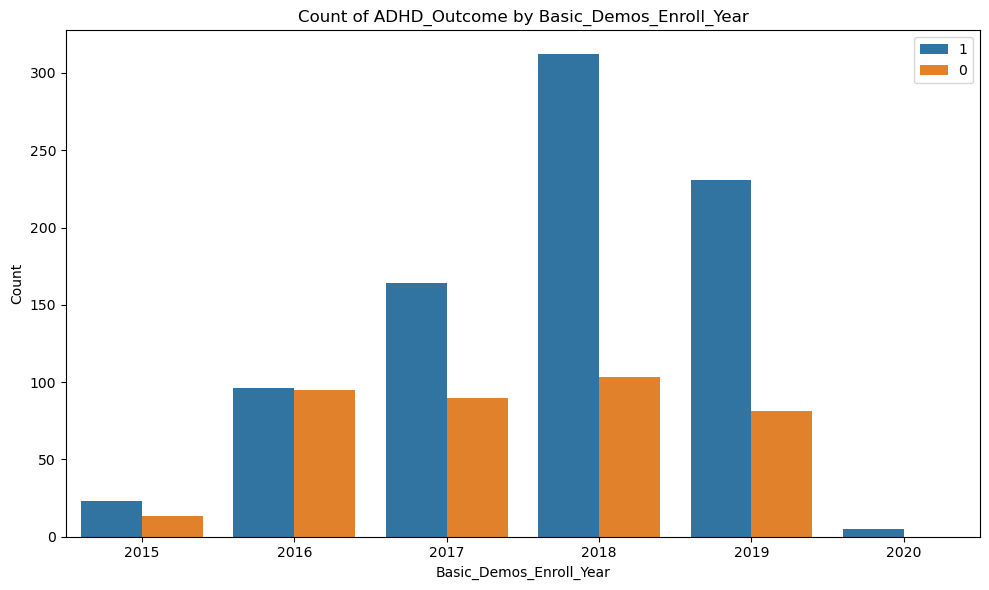

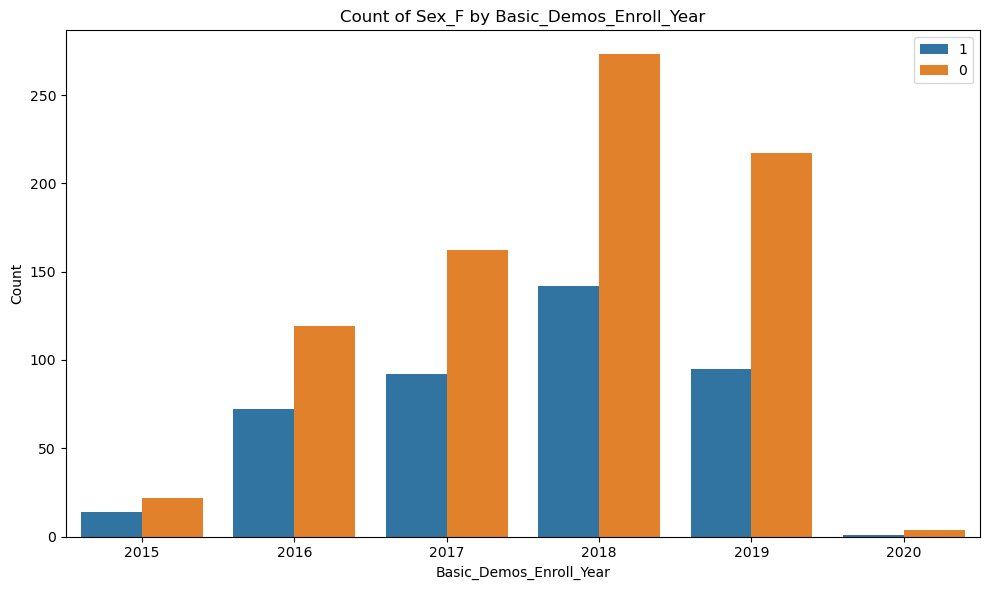

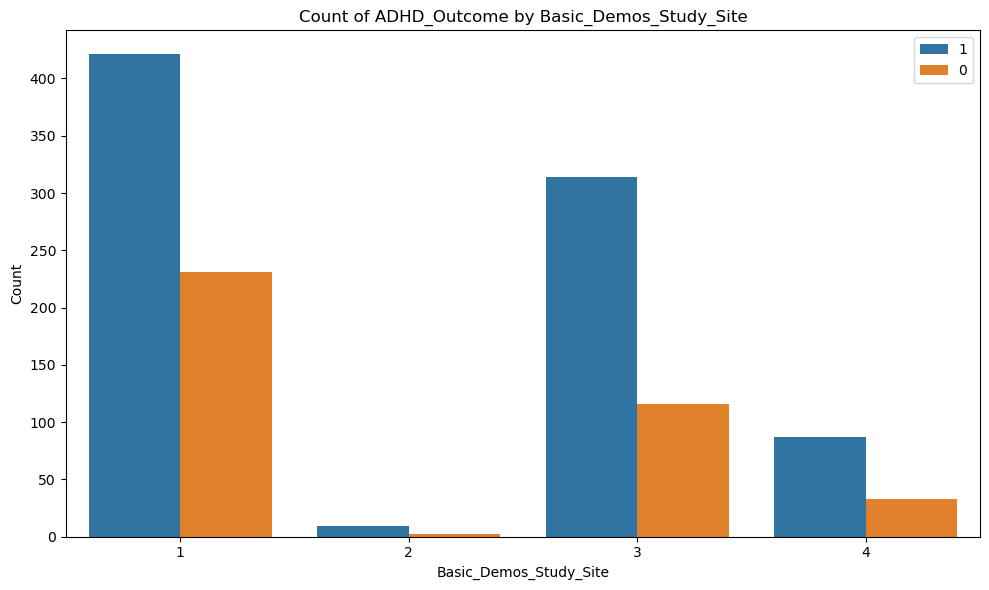

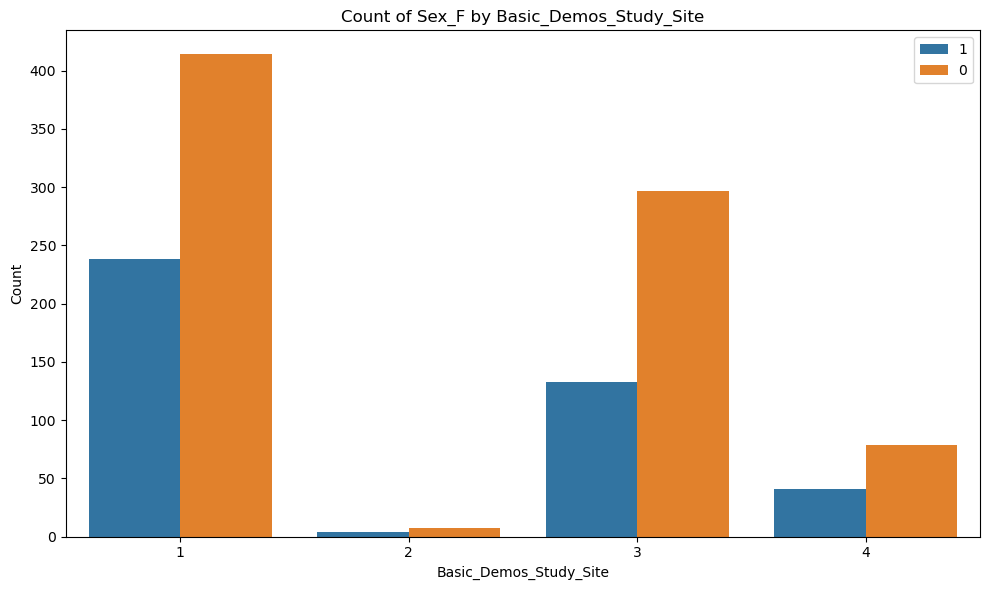

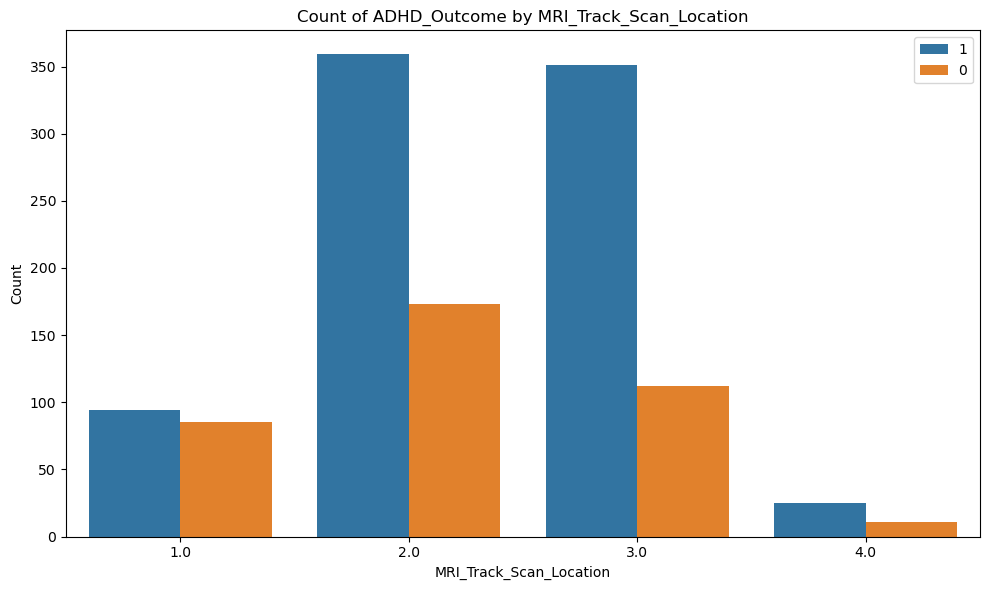

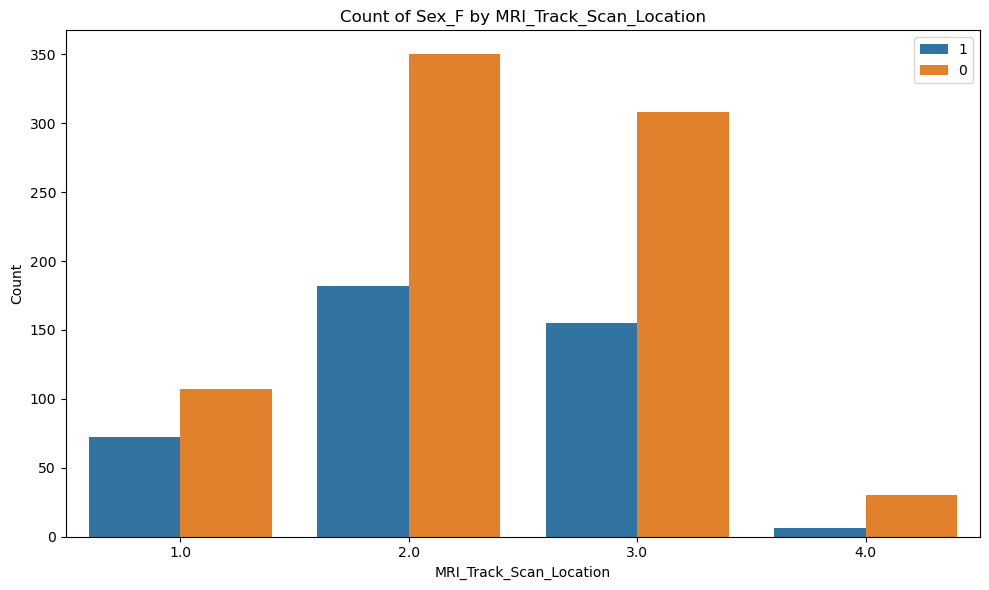

In [ ]:
for cat in cat_cols_keep:
    for target in target_cols:
        plt.figure(figsize=(10, 6))
        # Create a count plot with the grouping column on the x-axis
        # and using the outcome as hue to separate different categories
        ax = sns.countplot(data=df_cat, x=cat, hue=df_cat[target].astype('str'))
        plt.title(f"Count of {target} by {cat}")
        plt.xlabel(cat)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.legend()
        plt.show()

Basic_Demos_Study_Site:
- 1=Staten Island 
- 2=MRV
- 3=Midtown
- 4=Harlem
- 5=SI RUMC

In [87]:
df_cat_imp['Basic_Demos_Study_Site'].value_counts()

1    652
3    430
4    120
2     11
Name: Basic_Demos_Study_Site, dtype: int64

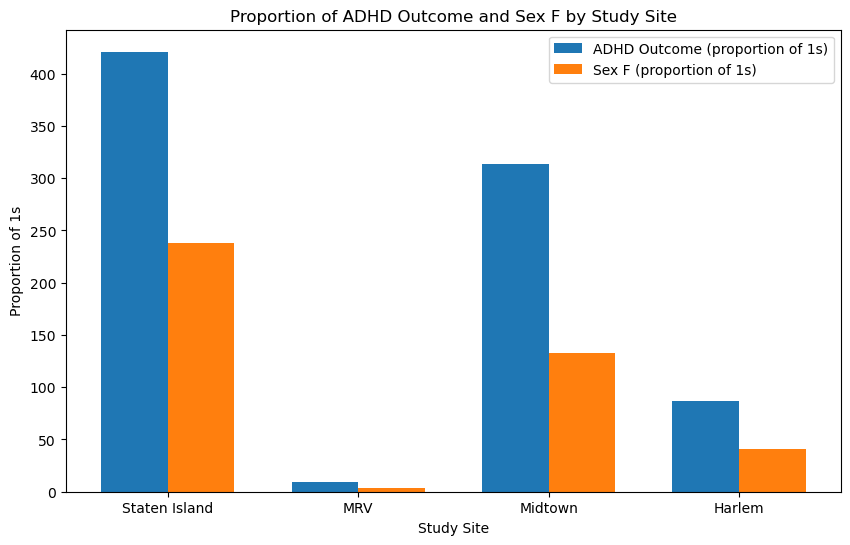

In [88]:
# Group by enroll_year and compute the mean (proportion of 1's) for both columns
study_counts = df_cat.groupby('Basic_Demos_Study_Site').agg({'ADHD_Outcome': 'sum', 'Sex_F': 'sum'}).reset_index()

# Define the positions and width for the bars
bar_width = 0.35
positions = study_counts['Basic_Demos_Study_Site']

plt.figure(figsize=(10, 6))

# Plot bars for ADHD outcomes
plt.bar(positions - bar_width/2, study_counts['ADHD_Outcome'], width=bar_width, label='ADHD Outcome (proportion of 1s)')

# Plot bars for Sex (F)
plt.bar(positions + bar_width/2, study_counts['Sex_F'], width=bar_width, label='Sex F (proportion of 1s)')

plt.xlabel('Study Site')
plt.ylabel('Proportion of 1s')
plt.title('Proportion of ADHD Outcome and Sex F by Study Site')
# Update x-tick labels: specify tick positions and new labels
plt.xticks(positions, ['Staten Island', 'MRV', 'Midtown', 'Harlem'])

plt.legend()
plt.show()
